In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,precision_score, recall_score, roc_curve, precision_recall_curve 
import itertools
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

### Upload Dataframe

In [2]:
#Read dataframe
df = pd.read_csv('data-breastCancer.csv')

In [3]:
#check the dataframe
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Data Preprocessing

In [4]:
#columns and rows
df.shape

(569, 33)

In [5]:
#Check coulmns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#There is two columns that should be removed
df.drop(['Unnamed: 32','id'], axis=1, inplace =True) 

In [7]:
#check if the columns was dropped
df.shape
#we have now 31 columns 

(569, 31)

In [8]:
#check nulls 
df.isnull().sum().sum()

0

In [9]:
#check duplicated values
df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

In [10]:
# check type of data
df.info()
#notice all data are numerical but one is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
#Exploring
df.describe().T
#Notice that the range of the data are different

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
df["diagnosis"].unique()
#this column has the result if Malignant = M, Benign = B

array(['M', 'B'], dtype=object)

In [13]:
#we need to convert it to 0 and 1
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

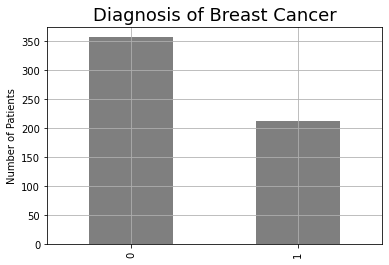

In [14]:
#we want to see the number of M comparing with B
df.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'black')
plt.title("Diagnosis of Breast Cancer", fontsize = '18')
plt.ylabel("Number of Patients")
plt.grid(b=True)

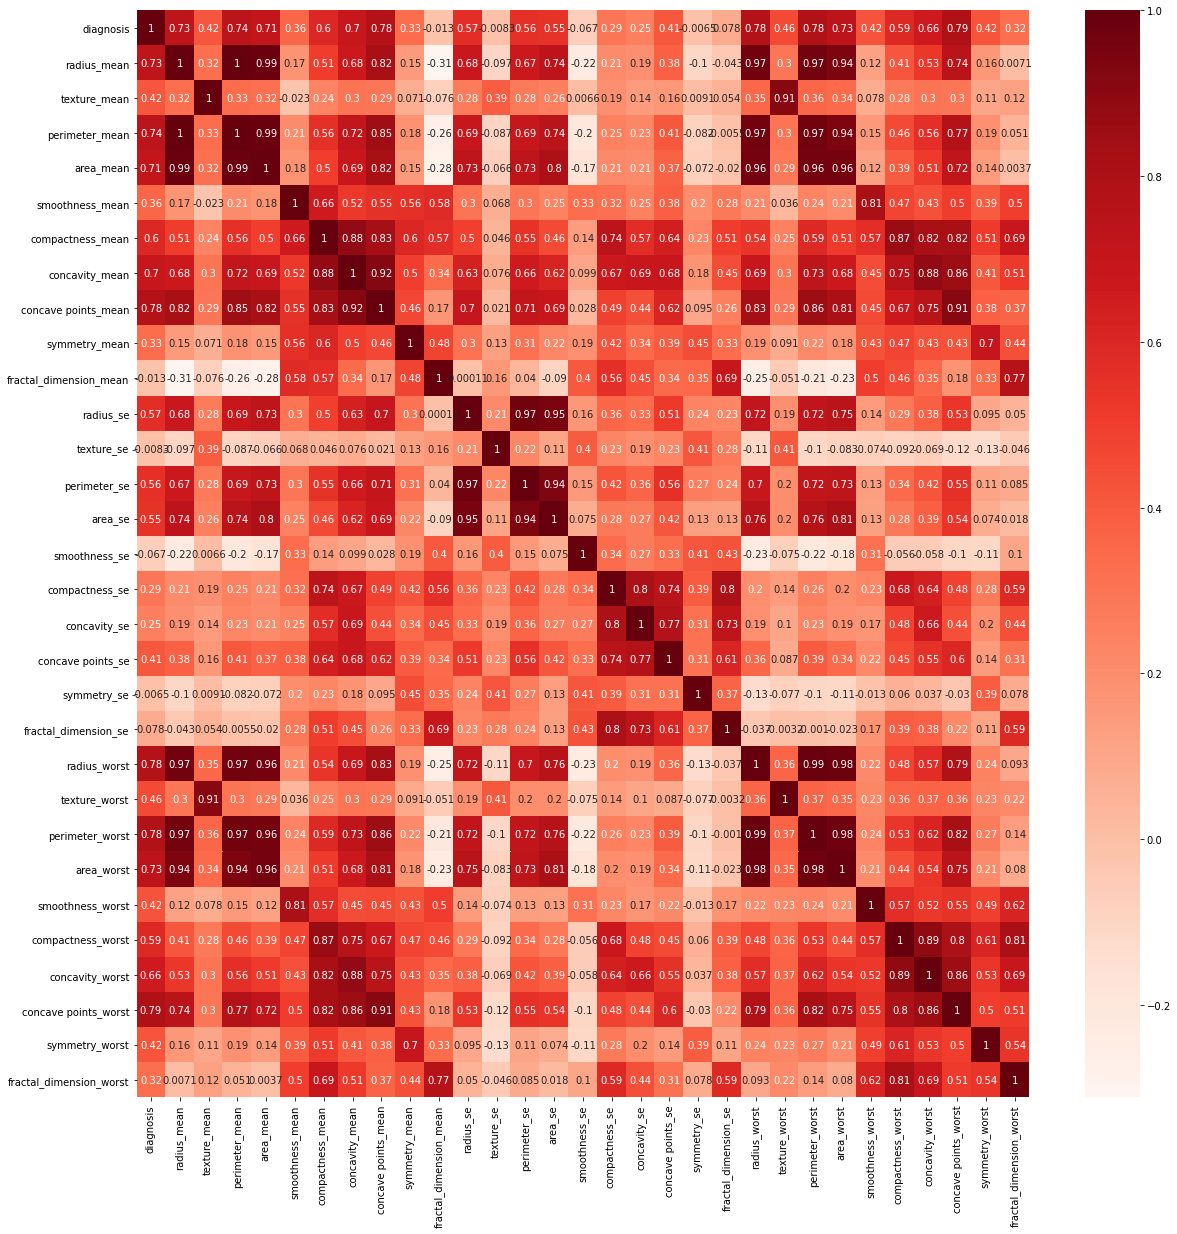

In [15]:
#check corralation between features
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [16]:
#Check features of highest corralation with the target
cor_target = abs(cor["diagnosis"])
rel_f= cor_target[cor_target>0.5]
rel_f

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [17]:
#Work with the features with high corralation only
#new dataframe
df = df[['diagnosis','radius_mean','perimeter_mean','area_mean',
'compactness_mean','concavity_mean','concave points_mean','radius_se','perimeter_se','area_se',
'radius_worst','perimeter_worst','area_worst','compactness_worst','concavity_worst','concave points_worst']]

### Implement a Random Forest Model for classification of the FNA images

In [18]:
# Define features and target
y = df.diagnosis
X = df.drop('diagnosis', axis=1)
z = X

In [19]:
# Normalization of features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

In [21]:
#build the model
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=1)

In [22]:
#fit to Train set
rf.fit(X_train, y_train)
#predict
y_pred = rf.predict(X_test)

In [23]:
#Check accuracy
val_train = round(rf.score(X_train, y_train),2)*100
val_test = round(rf.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 94.0%
Test Set Accuracy: 92.0%


In [24]:
# Conduct N-fold cross validation. (1 point)
scores = cross_val_score(rf,X_train, y_train, cv=10 )
scores

array([0.84782609, 0.91304348, 0.95652174, 0.91304348, 0.89130435,
       0.97777778, 0.97777778, 0.95555556, 0.97777778, 0.88888889])

In [25]:
#print avarage score
print(np.mean(scores))

0.929951690821256


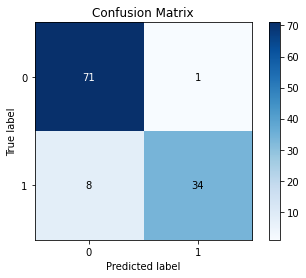

In [26]:
# Develop a confusion matrix for each classification result. (1 points)
cm=confusion_matrix(y_test, y_pred)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

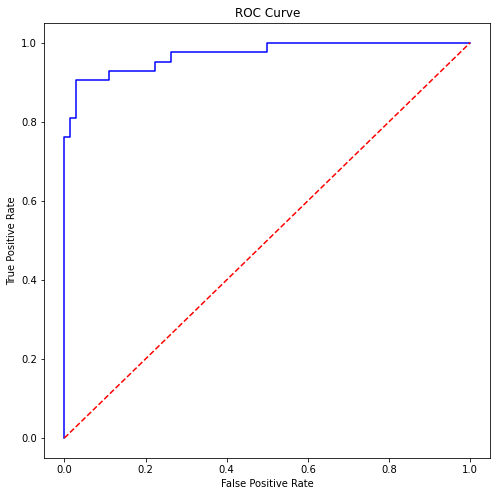

Area under curve =  0.970568783068783


In [28]:
# Create ROC curve for training (optional). (1 point bonus)
import sklearn.metrics as metrics
probabilityvector = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilityvector, pos_label=1)
fig, ax = plt.subplots(figsize=(8, 8))
recall = metrics.recall_score(y_test, y_pred)
ax.plot(fpr, tpr, color='blue')
ax.plot([0,1], [0,1], color='red', linestyle='dashed')
ax.set(xlabel='False Positive Rate', ylabel="True Positive Rate", title="ROC Curve")
plt.show()
# Calculate Area Under Roc

print("Area under curve = ",roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
#higher AUC better the model